In [2]:
%pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
df = pd.read_csv("data/train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df_temp = df.drop("Gender",axis=1)
df_temp.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df_temp.shape

(614, 12)

#  convert married from object to float 

In [10]:
df_temp["Married"] = df["Married"].map({'Yes':1,'No':0})


In [11]:
df_temp.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Married            611 non-null    float64
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


In [13]:
df_temp.drop("Loan_ID" , axis=1,inplace=True)


In [14]:
df_temp.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df_temp["Education"] = df["Education"].map({'Graduate':1,'Not Graduate':0})


In [16]:
df_temp.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0.0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
df_temp["Self_Employed"] = df["Self_Employed"].map({'Yes':1,'No':0})

In [18]:
df_temp.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            611 non-null    float64
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    int64  
 3   Self_Employed      582 non-null    float64
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 52.9+ KB


In [20]:
df_temp['Dependents'] = df_temp['Dependents'].replace('3+', 3)
df_temp['Dependents'] = df_temp['Dependents'].astype(float)

In [21]:
df_temp.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            611 non-null    float64
 1   Dependents         599 non-null    float64
 2   Education          614 non-null    int64  
 3   Self_Employed      582 non-null    float64
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 52.9+ KB


In [23]:
df_temp.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
df_temp["Property_Area"] = df["Property_Area"].map({'Urban':1,'Rural':0})

In [25]:
df_temp.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1.0,Y
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0.0,N
2,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1.0,Y
3,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1.0,Y
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1.0,Y


In [26]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            611 non-null    float64
 1   Dependents         599 non-null    float64
 2   Education          614 non-null    int64  
 3   Self_Employed      582 non-null    float64
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      381 non-null    float64
 10  Loan_Status        614 non-null    object 
dtypes: float64(8), int64(2), object(1)
memory usage: 52.9+ KB


In [27]:
df_temp["Loan_Status"] = df["Loan_Status"].map({'Y':1,'N':0})

In [28]:
df_temp.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1.0,1
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1.0,1
3,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1.0,1
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1.0,1


In [29]:
df_temp.value_counts()

Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
1.0      0.0         1          0.0            4333             2451.0             110.0       360.0             1.0             1.0            0              2
0.0      0.0         0          0.0            1442             0.0                35.0        360.0             1.0             1.0            0              1
1.0      1.0         1          0.0            3333             3250.0             158.0       360.0             1.0             1.0            1              1
                                               5500             1260.0             170.0       360.0             1.0             0.0            1              1
                                               4666             0.0                135.0       360.0             1.0             1.0            1              1
                                       

In [30]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            611 non-null    float64
 1   Dependents         599 non-null    float64
 2   Education          614 non-null    int64  
 3   Self_Employed      582 non-null    float64
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      381 non-null    float64
 10  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 52.9 KB


In [31]:
df_temp.describe()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,381.000000,614.000000
mean,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.530184,0.687296
std,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.499744,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000


In [32]:
df_temp.isna().sum()

Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area        233
Loan_Status            0
dtype: int64

In [33]:
df_temp['Married'].fillna(df_temp['Married'].mode()[0], inplace=True)
df_temp.isna().sum()

/var/folders/fd/2d33_ptj5sndr1qwvq88fzc40000gn/T/ipykernel_12653/4194914023.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp['Married'].fillna(df_temp['Married'].mode()[0], inplace=True)


Married                0
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area        233
Loan_Status            0
dtype: int64

In [34]:
df_temp['Dependents'].fillna(df_temp['Dependents'].mode()[0], inplace=True)
df_temp.isna().sum()

/var/folders/fd/2d33_ptj5sndr1qwvq88fzc40000gn/T/ipykernel_12653/2402680055.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp['Dependents'].fillna(df_temp['Dependents'].mode()[0], inplace=True)


Married                0
Dependents             0
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area        233
Loan_Status            0
dtype: int64

In [35]:
df_temp['Self_Employed'].fillna(df_temp['Self_Employed'].mode()[0], inplace=True)
df_temp['LoanAmount'].fillna(df_temp['LoanAmount'].median(), inplace=True)
df_temp['Loan_Amount_Term'].fillna(df_temp['Loan_Amount_Term'].mode()[0], inplace=True)
df_temp['Credit_History'].fillna(df_temp['Credit_History'].mode()[0], inplace=True)
df_temp['Property_Area'].fillna(df_temp['Property_Area'].mode()[0], inplace=True)
df_temp.isna().sum()

/var/folders/fd/2d33_ptj5sndr1qwvq88fzc40000gn/T/ipykernel_12653/134039493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp['Self_Employed'].fillna(df_temp['Self_Employed'].mode()[0], inplace=True)
/var/folders/fd/2d33_ptj5sndr1qwvq88fzc40000gn/T/ipykernel_12653/134039493.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x = df_temp.drop("Loan_Status" , axis=1)
y = df_temp["Loan_Status"]

In [37]:
x

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,1.0
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1.0
3,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1.0
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0.0
610,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0.0
611,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1.0
612,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,1.0


In [38]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [39]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)


In [40]:
model = RandomForestClassifier()
model.fit(x_train , y_train)

RandomForestClassifier()

In [41]:
model.score(x_test , y_test)

0.7967479674796748

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)
print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

Best Score: 0.8084518655947228
Best Params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [43]:
model = RandomForestClassifier(
    max_depth=5,
    min_samples_split=10,
    n_estimators=300,
    random_state=42  # Optional but good for reproducibility
)

In [44]:
model.fit(x_train , y_train)
model.score(x_test , y_test)

0.8211382113821138

In [45]:
%pip install xgboost
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(x_train, y_train)
print("Accuracy:", model.score(x_test, y_test))

Note: you may need to restart the kernel to use updated packages.
Accuracy: 0.7479674796747967


In [46]:
df_temp['Loan_Status'].value_counts(normalize=True)

Loan_Status
1    0.687296
0    0.312704
Name: proportion, dtype: float64

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14 19]
 [ 7 83]]
              precision    recall  f1-score   support

           0       0.67      0.42      0.52        33
           1       0.81      0.92      0.86        90

    accuracy                           0.79       123
   macro avg       0.74      0.67      0.69       123
weighted avg       0.77      0.79      0.77       123



In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(x_train, y_train)
print("Accuracy:", model.score(x_test, y_test))

Accuracy: 0.7886178861788617


In [55]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [20, 40,60,80,100,120,140,160,180,200,220,240,280,320,350,380,420,470, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [59]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # number of different combinations to try
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1  # use all cores
)
rand_search.fit(x_train, y_train)
best_rf = rand_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[CV] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=420; total time=   0.3s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=420; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=420; total time=   0.3s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=420; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=280; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=280; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=280; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_l

In [60]:
accuracy = best_rf.score(x_test, y_test)
print("Best Parameters:", rand_search.best_params_)
print("Test Accuracy:", accuracy)

Best Parameters: {'n_estimators': 320, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'bootstrap': True}
Test Accuracy: 0.7967479674796748


Confusion Matrix:
 [[14 19]
 [ 6 84]]


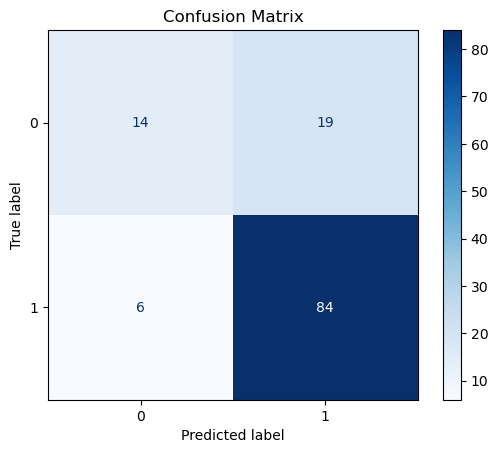

Classification Report:

                  precision    recall  f1-score   support

Not Approved (0)       0.70      0.42      0.53        33
    Approved (1)       0.82      0.93      0.87        90

        accuracy                           0.80       123
       macro avg       0.76      0.68      0.70       123
    weighted avg       0.78      0.80      0.78       123



In [62]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on test set using best model from RandomizedSearchCV
best_model = rand_search.best_estimator_
y_pred = best_model.predict(x_test)

# 1. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 2. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 3. Classification report (precision, recall, F1)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Not Approved (0)", "Approved (1)"]))

In [63]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split first if not already
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("Original y_train class distribution:\n", y_train.value_counts())
print("After SMOTE y_train class distribution:\n", y_train_smote.value_counts())

Original y_train class distribution:
 Loan_Status
1    342
0    149
Name: count, dtype: int64
After SMOTE y_train class distribution:
 Loan_Status
0    342
1    342
Name: count, dtype: int64


In [66]:
rf_smote = RandomForestClassifier(n_estimators=300, random_state=42)
rf_smote.fit(x_train_smote, y_train_smote)

RandomForestClassifier(n_estimators=300, random_state=42)

In [67]:
y_pred = rf_smote.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Not Approved (0)", "Approved (1)"]))

Confusion Matrix:
 [[21 22]
 [ 5 75]]
Classification Report:

                  precision    recall  f1-score   support

Not Approved (0)       0.81      0.49      0.61        43
    Approved (1)       0.77      0.94      0.85        80

        accuracy                           0.78       123
       macro avg       0.79      0.71      0.73       123
    weighted avg       0.79      0.78      0.76       123



In [68]:
import pickle

# Save the model to a file
with open('smote_rf_model.pkl', 'wb') as file:
    pickle.dump(rf_smote, file)

print("Model saved as 'smote_rf_model.pkl'")

Model saved as 'smote_rf_model.pkl'


Exception ignored in: <function ResourceTracker.__del__ at 0x1030d4540>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/car-sales-env/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/miniconda3/envs/car-sales-env/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/miniconda3/envs/car-sales-env/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106750540>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/car-sales-env/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/miniconda3/envs/car-sales-env/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/miniconda3/envs/car-sales-env/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No 